In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
circle = pd.read_csv("33643060-cluster-circles.csv")
circle.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


In [9]:
blobs = pd.read_csv("33643080-cluster-blobs.csv")
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


In [10]:
moon = pd.read_csv("33643082-cluster-moons.csv")
moon.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


<Axes: xlabel='X1', ylabel='X2'>

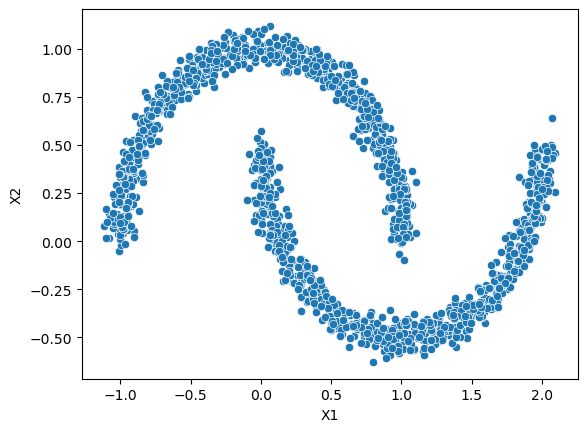

In [11]:
sns.scatterplot(data = moon ,x = "X1" ,y = "X2")

<Axes: xlabel='X1', ylabel='X2'>

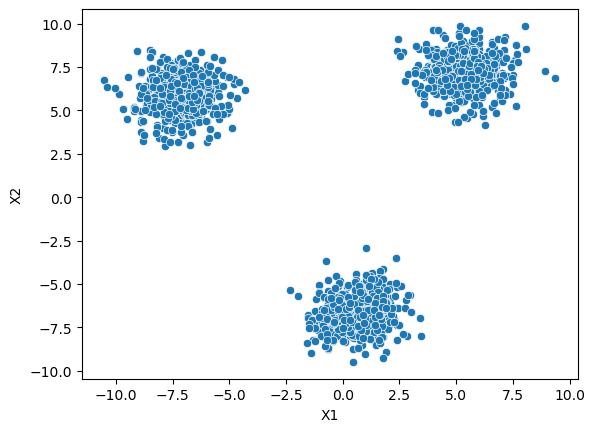

In [12]:
sns.scatterplot(data = blobs ,x = "X1" ,y = "X2")

<Axes: xlabel='X1', ylabel='X2'>

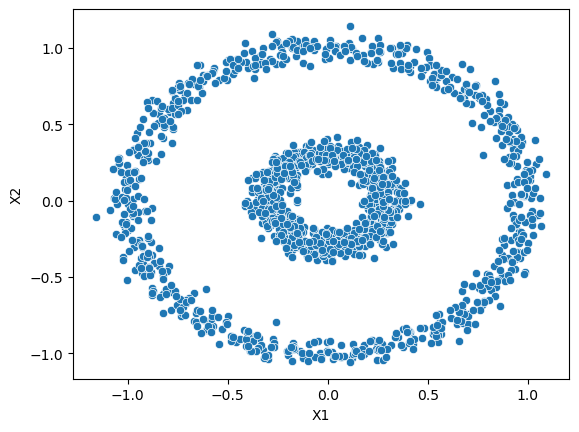

In [13]:
sns.scatterplot(data = circle ,x = "X1" ,y = "X2")

## Label Discovery

In [15]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

## KMeans Result

In [24]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2)

C:\Users\Barcha\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


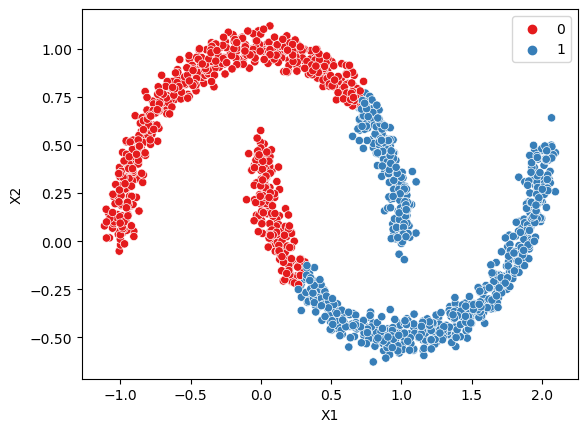

In [25]:
display_categories(model, moon)

C:\Users\Barcha\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


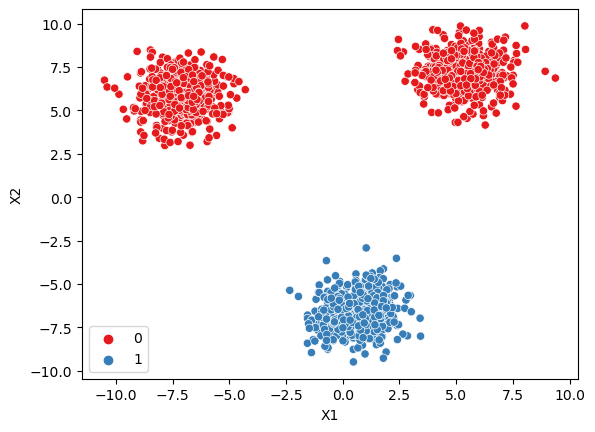

In [26]:
display_categories(model, blobs)

C:\Users\Barcha\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


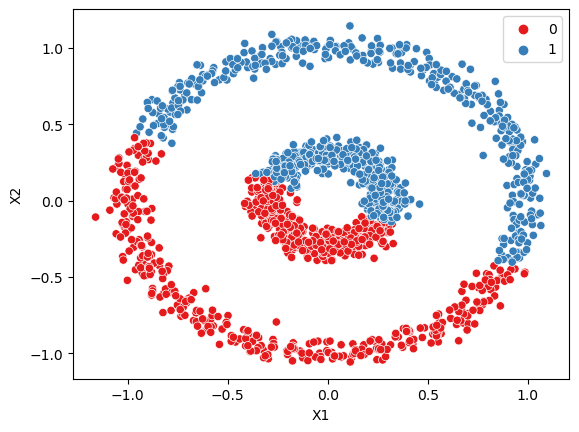

In [28]:
display_categories(model, circle)

## DBSCAN Results

In [48]:
from sklearn.cluster import DBSCAN

In [49]:
model = DBSCAN(eps = 0.15)

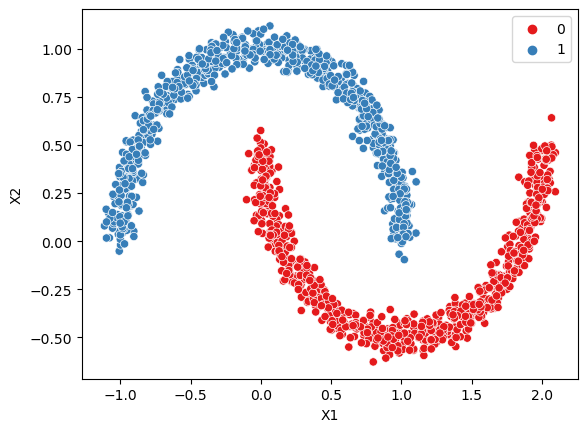

In [50]:
display_categories(model,moon)

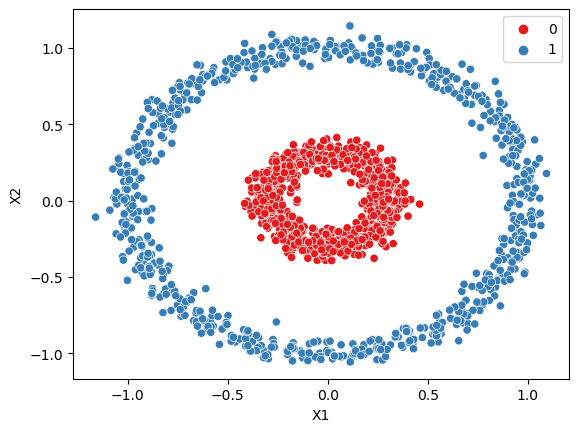

In [52]:
display_categories(model,circle)

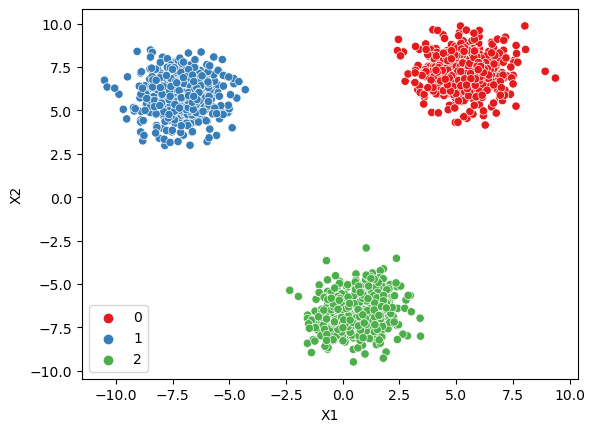

In [57]:
model = DBSCAN(eps = 1.5)
display_categories(model,blobs)

## HyperParameters

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
two_blobs = pd.read_csv('33643072-cluster-two-blobs.csv')
two_blobs_outliers = pd.read_csv('33643070-cluster-two-blobs-outliers.csv')

<Axes: xlabel='X1', ylabel='X2'>

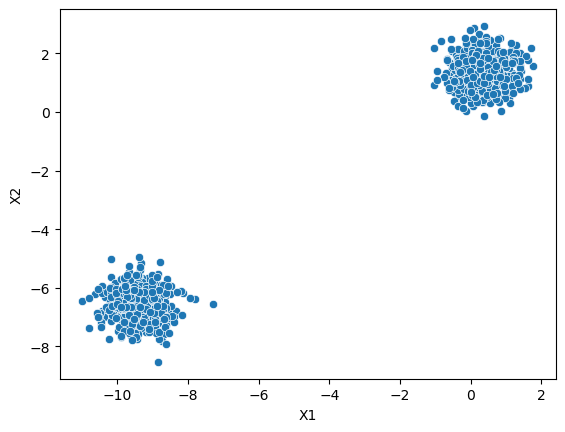

In [61]:
sns.scatterplot(data=two_blobs,x='X1',y='X2')

<Axes: xlabel='X1', ylabel='X2'>

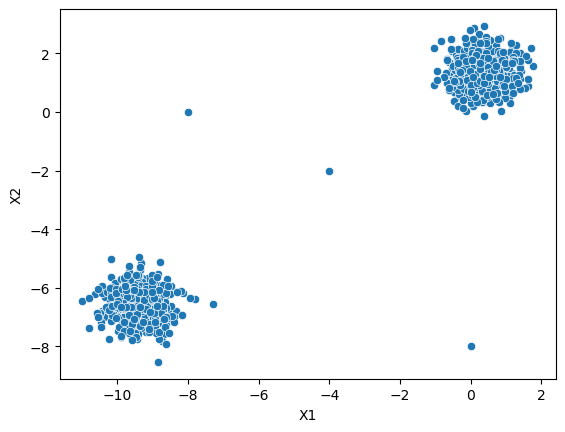

In [62]:
# plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=two_blobs_outliers,x='X1',y='X2')

## Label Discovery

In [63]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

## DBSCAN

In [64]:
from sklearn.cluster import DBSCAN

In [65]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  The worst case memory complexity of DBSCAN is :math:`O({n}^2)`, which can
 |  occur when the `eps` param is large and `min_samples` is low.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a c

In [66]:
dbscan = DBSCAN()


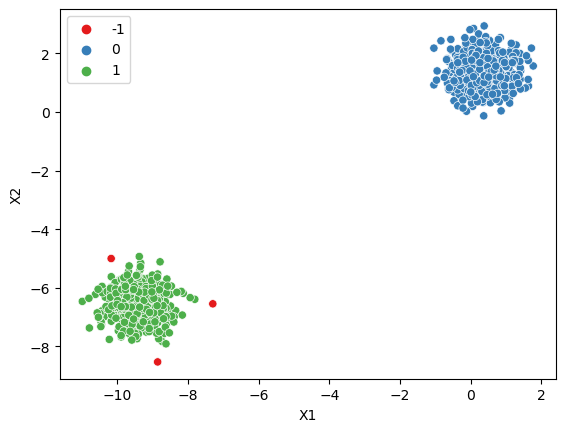

In [67]:
display_categories(dbscan,two_blobs)

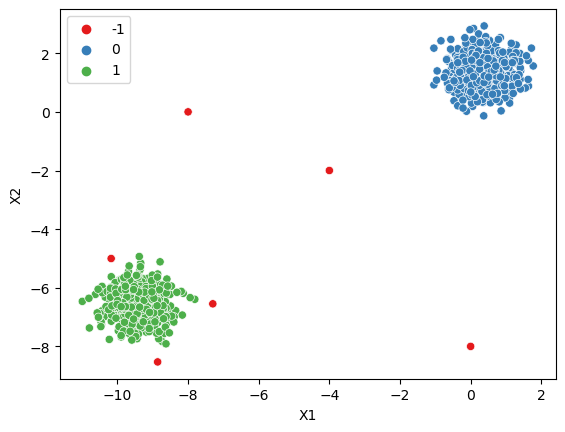

In [68]:
display_categories(dbscan,two_blobs_outliers)

# Epsilon

    eps : float, default=0.5
     |      The maximum distance between two samples for one to be considered
     |      as in the neighborhood of the other. This is not a maximum bound
     |      on the distances of points within a cluster. This is the most
     |      important DBSCAN parameter to choose appropriately for your data set
     |      and distance function.

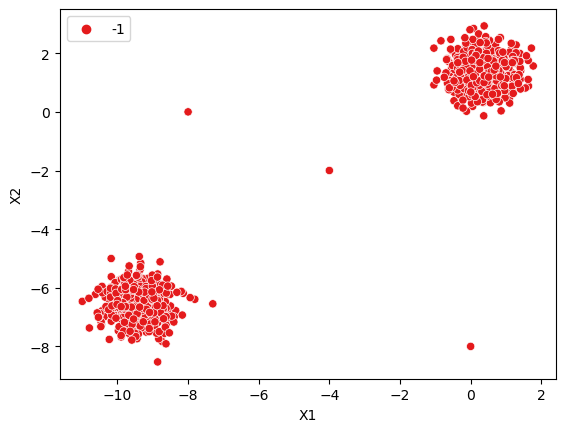

In [69]:
# Tiny Epsilon --> Tiny Max Distance --> Everything is an outlier (class=-1)
dbscan = DBSCAN(eps=0.001)
display_categories(dbscan,two_blobs_outliers)

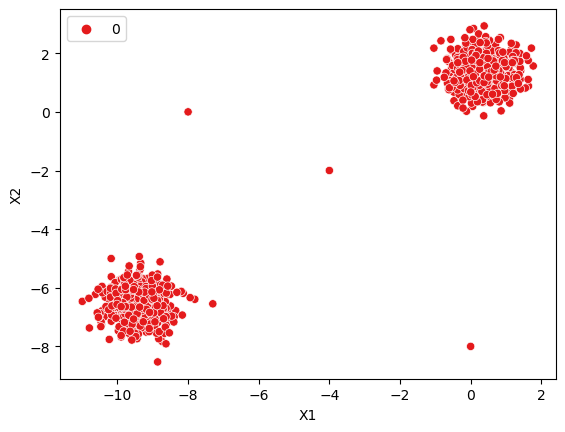

In [70]:
# Huge Epsilon --> Huge Max Distance --> Everything is in the same cluster (class=0)
dbscan = DBSCAN(eps=10)
display_categories(dbscan,two_blobs_outliers)

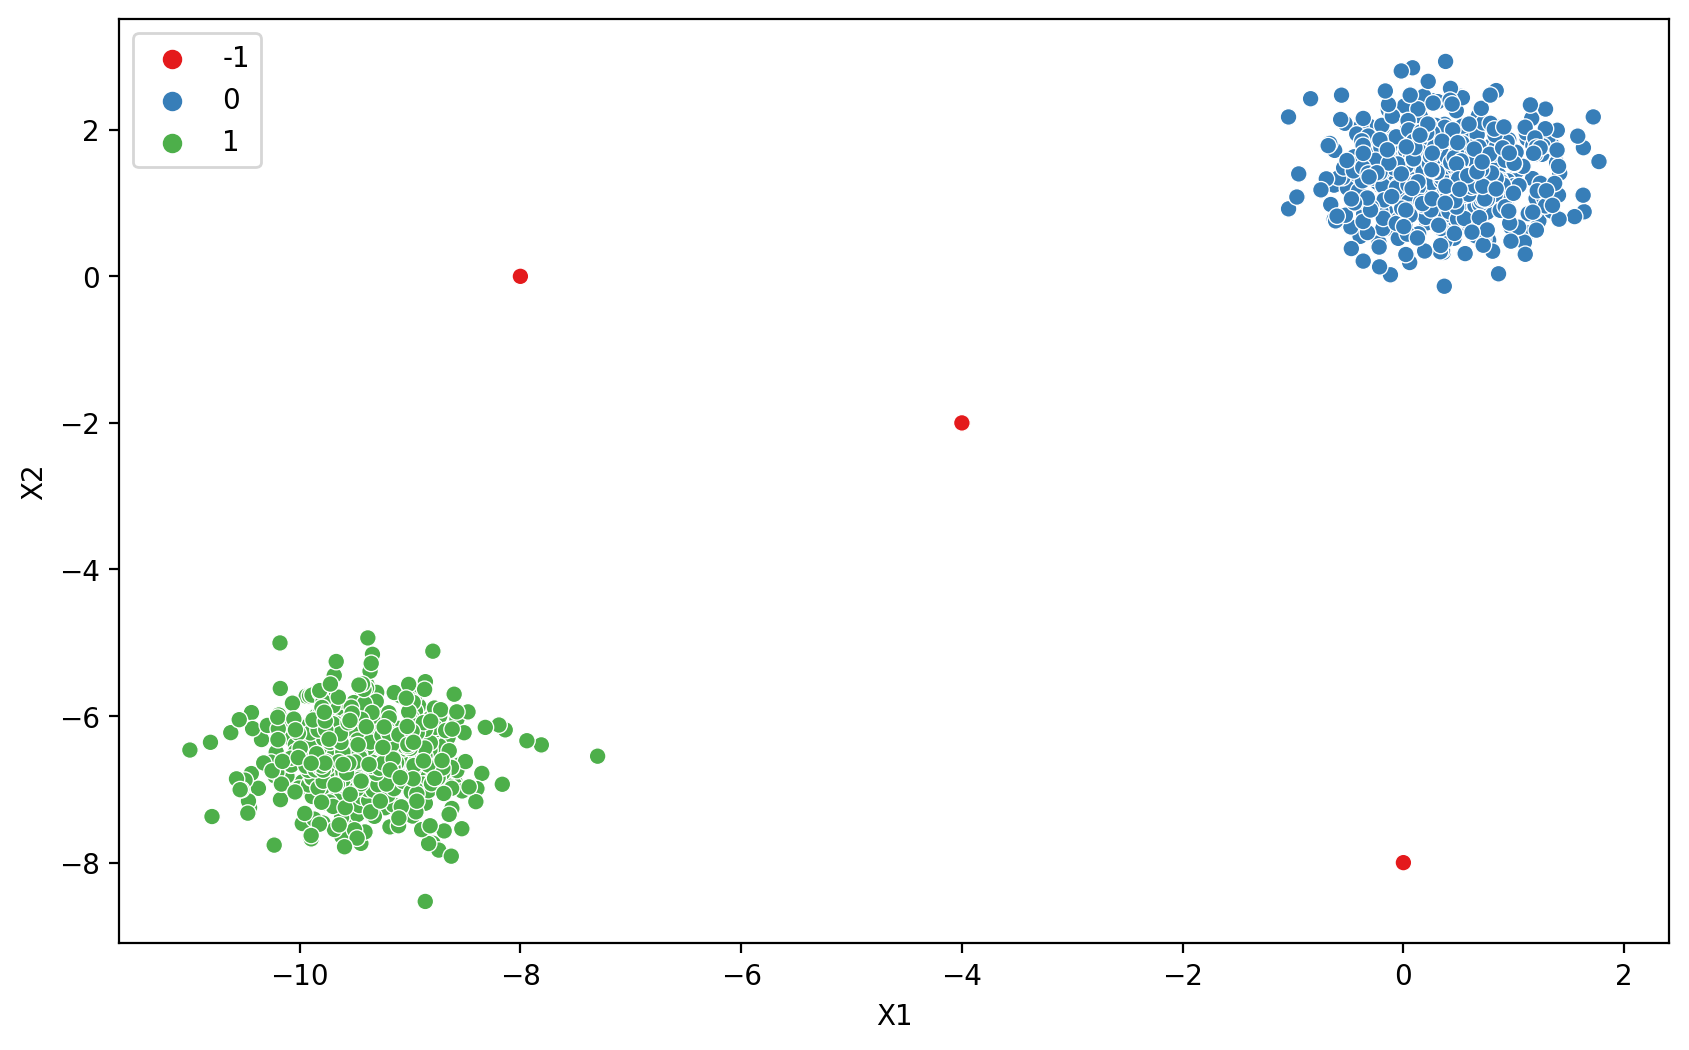

In [71]:
# How to find a good epsilon?
plt.figure(figsize=(10,6),dpi=200)
dbscan = DBSCAN(eps=1)
display_categories(dbscan,two_blobs_outliers)

In [72]:
dbscan.labels_

array([ 0,  1,  0, ..., -1, -1, -1], dtype=int64)

In [73]:
dbscan.labels_ == -1

array([False, False, False, ...,  True,  True,  True])

In [74]:
np.sum(dbscan.labels_ == -1)

3

In [75]:
100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

0.29910269192422734

## Charting reasonable Epsilon values

In [77]:
# bend the knee! https://raghavan.usc.edu/papers/kneedle-simplex11.pdf

In [79]:
# np.arange(start=0.01,stop=10,step=0.01)

In [76]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,10,100):
    
    # Create Model
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    # Log Number of Outliers
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)
    

Text(0.5, 0, 'Epsilon Value')

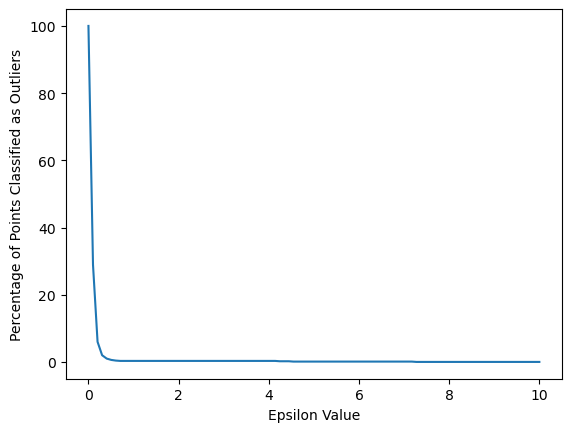

In [84]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

(0.0, 1.0)

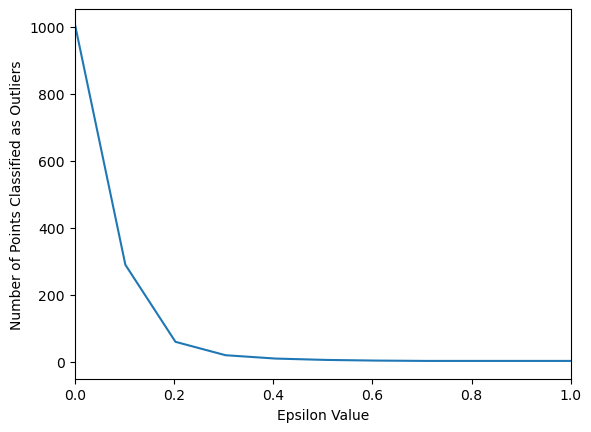

In [85]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.xlim(0,1)

### Do we want to think in terms of percentage targeting instead?

If so, you could "target" a percentage, like choose a range producing 1%-5% as outliers.

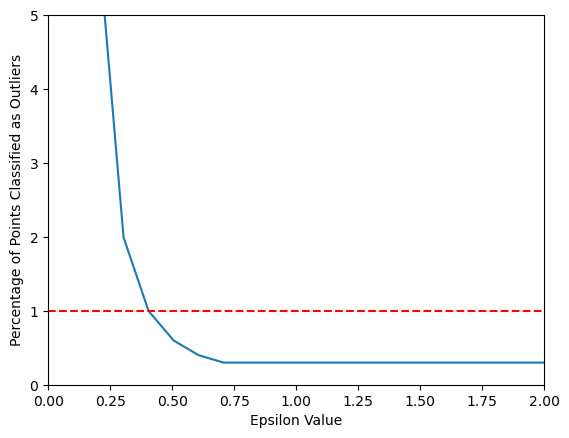

In [87]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,5)
plt.xlim(0,2)
plt.hlines(y=1,xmin=0,xmax=2,colors='red',ls='--')

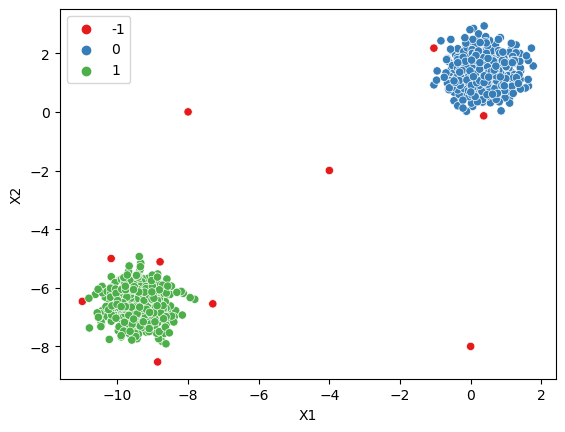

In [88]:
# How to find a good epsilon?
dbscan = DBSCAN(eps=0.4)
display_categories(dbscan,two_blobs_outliers)

### Do we want to think in terms of number of outliers targeting instead?

If so, you could "target" a number of outliers, such as 3 points as outliers.

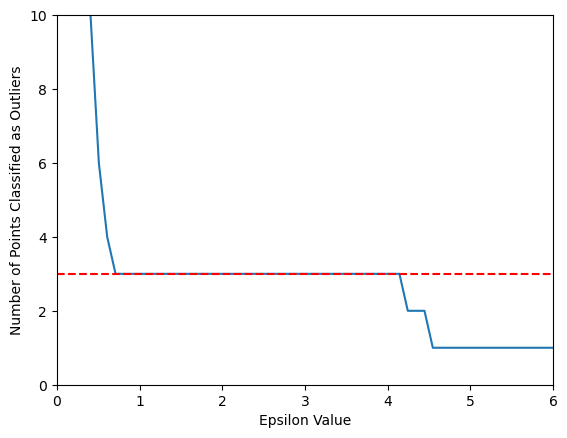

In [89]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,10)
plt.xlim(0,6)
plt.hlines(y=3,xmin=0,xmax=10,colors='red',ls='--')

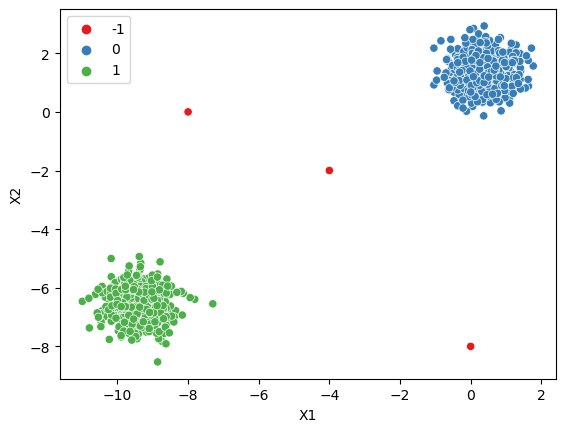

In [90]:
# How to find a good epsilon?
dbscan = DBSCAN(eps=0.75)
display_categories(dbscan,two_blobs_outliers)

## Minimum Samples

     |  min_samples : int, default=5
     |      The number of samples (or total weight) in a neighborhood for a point
     |      to be considered as a core point. This includes the point itself.
     

How to choose minimum number of points?

https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan

In [91]:
outlier_percent = []

for n in np.arange(1,100):
    
    # Create Model
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)
    

Text(0.5, 0, 'Minimum Number of Samples')

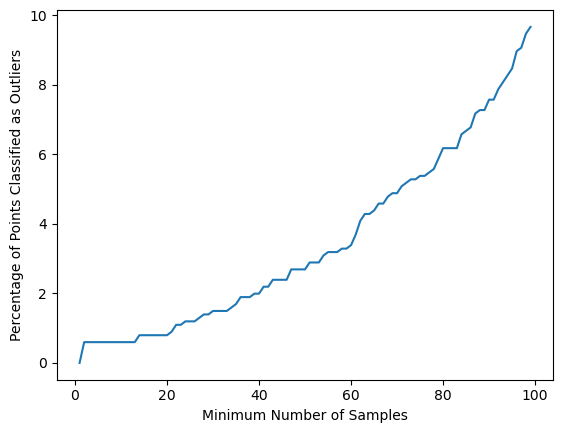

In [92]:
sns.lineplot(x=np.arange(1,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Minimum Number of Samples")

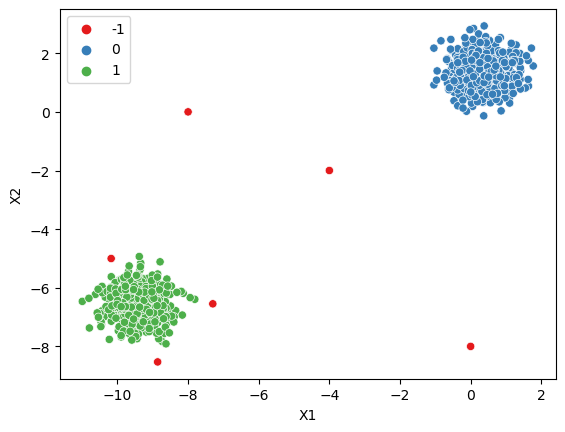

In [93]:
num_dim = two_blobs_outliers.shape[1]

dbscan = DBSCAN(min_samples=2*num_dim)
display_categories(dbscan,two_blobs_outliers)

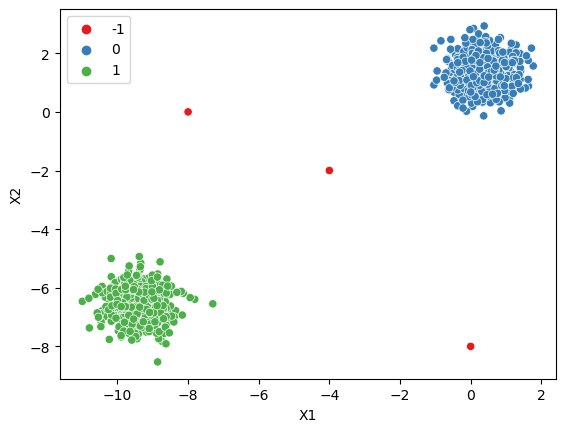

In [94]:
num_dim = two_blobs_outliers.shape[1]

dbscan = DBSCAN(eps=0.75,min_samples=2*num_dim)
display_categories(dbscan,two_blobs_outliers)

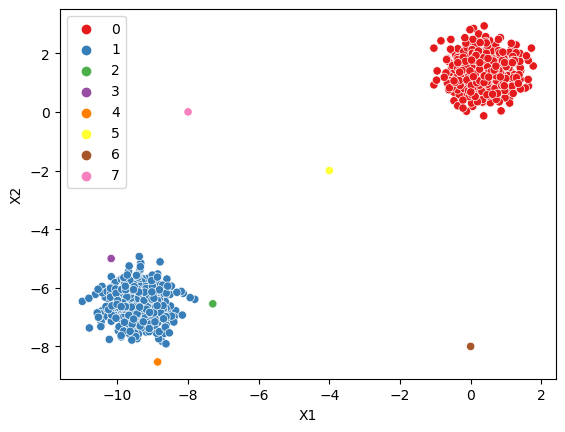

In [95]:
dbscan = DBSCAN(min_samples=1)
display_categories(dbscan,two_blobs_outliers)

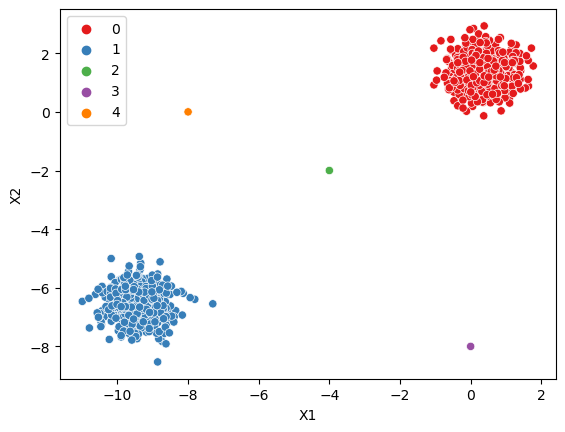

In [96]:
dbscan = DBSCAN(eps=0.75,min_samples=1)
display_categories(dbscan,two_blobs_outliers)